In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean

In [2]:
# начальные условия
n1, n2 = 1000, 2000 # количество объектов наблюдений в классах
a1, a2 = np.array([-1, 0]), np.array([2,3]) # вектора мат. ожиданий
r1, r2 = np.array([[1, 0.9], [0.9, 2]]), np.array([[2,0.9],[0.9, 1]]) # корр. матрицы
df1, df2 = np.random.multivariate_normal(a1, r1, n1),\
    np.random.multivariate_normal(a2, r2, n2) 
df1.shape, df2.shape # размерности массивов

((1000, 2), (2000, 2))

In [3]:
df = np.concatenate((df1, df2))
df.shape # размерность массивов после соединения

(3000, 2)

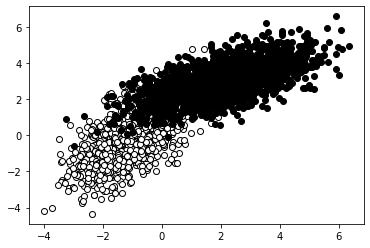

In [4]:
plt.subplot()
plt.scatter(x=df1[:,0], y=df1[:,1], c='white', edgecolors='black')
plt.scatter(x=df2[:,0], y=df2[:,1], c='black')
plt.savefig('data/gendatascatterplot-03.jpeg', dpi=500)
plt.savefig('data/gendatascatterplot-03.svg')

In [5]:
n_cluster = 2
clstr = KMeans(n_clusters=n_cluster, random_state=13).fit(df) # модель
y_predict = clstr.predict(df)
y_predict

array([0, 0, 0, ..., 0, 1, 1])

In [6]:
centroids = clstr.cluster_centers_ # координаты всех центроид
centroids

array([[-1.02443793,  0.09576113],
       [ 2.29479959,  3.15128578]])

In [7]:
labelsclst = clstr.labels_ # кластеры лейблы
labelsclst

array([0, 0, 0, ..., 0, 1, 1])

In [8]:
print(f'Сумма квадратов расстояний от образцов до ближайшего центра кластера: {clstr.inertia_}')

Сумма квадратов расстояний от образцов до ближайшего центра кластера: 7383.006120581307


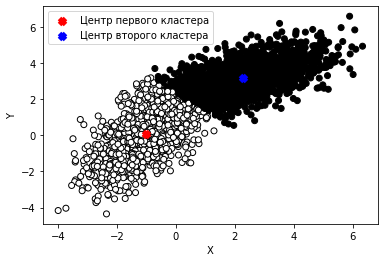

In [9]:
plt.subplot()
plt.scatter(x=df[:,0],y=df[:,1], c=y_predict, cmap=plt.cm.binary, edgecolors='black')
plt.scatter(x=centroids[0,0], y=centroids[0,1], c='red', marker='x',linewidths=5,\
           label='Центр первого кластера')
plt.scatter(x=centroids[1,0], y=centroids[1,1], c='blue', marker='x',linewidths=5,\
            label='Центр второго кластера')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
# plt.show()
plt.savefig('data/gendataclusters-03.jpeg', dpi=500)
plt.savefig('data/gendataclusters-03.svg', dpi=500)

In [10]:
def distance_to_centroid(row, centroid, cols):
    row = row[cols]
    return euclidean(row, centroid)

In [11]:
df = pd.DataFrame(data=df, columns=['x','y'])
df['label'] = clstr.labels_

In [12]:
df['distance_to_center0'] = df[df.label == 0].apply(lambda r: distance_to_centroid(r,centroids[0],['x','y']),1)
df['distance_to_center1'] = df[df.label == 1].apply(lambda r: distance_to_centroid(r,centroids[1],['x','y']),1)

In [13]:
df

,x,y,label,distance_to_center0,distance_to_center1
0,-1.762229,-1.885197,0,2.113890,NaN
1,-1.527482,0.989654,0,1.025718,NaN
2,-0.750690,0.418289,0,0.423039,NaN
3,-2.531598,-1.931439,0,2.526079,NaN
4,-0.109199,2.108460,0,2.211023,NaN
...,...,...,...,...,...
2995,1.507921,3.267803,1,NaN,0.795458
2996,0.867700,1.677591,1,NaN,2.051436
2997,-0.280629,2.430936,0,2.450774,NaN
2998,0.889291,3.065115,1,NaN,1.408147


## Birth Data v2

In [14]:
birth = pd.read_csv('data/02-birth.txt', sep='\s+', skiprows=[13], header=13, usecols=['Sex','Head','Chest']) # sep='\s+' - один и более пробелов
birth.head()

,Sex,Head,Chest
1,female,31.0,30.0
2,female,36.0,35.3
3,male,33.0,34.0
4,male,35.0,36.0
5,male,34.0,35.0


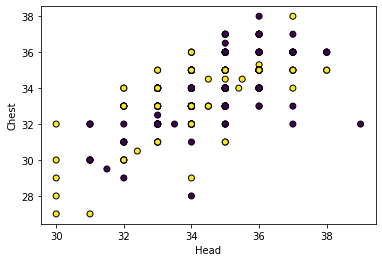

In [24]:
plt.subplot(111)
plt.scatter(x=birth.Head,y=birth.Chest, c=birth.Sex.map({'male':0,'female':1}), edgecolors='black')
plt.xlabel('Head')
plt.ylabel('Chest')
# plt.show()
plt.savefig('data/birthbysex.jpeg', dpi=500)
plt.savefig('data/birthbysex.svg')

In [16]:
n_clst_birth = birth.Sex.unique().size

In [17]:
clstbirth = KMeans(n_clusters=n_clst_birth).fit(birth[['Head','Chest']])
y_predict_ab = clstbirth.predict(birth[['Head','Chest']])
y_predict_ab

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,

In [18]:
clstbirth.cluster_centers_

array([[35.31525424, 34.71737288],
       [33.1945122 , 32.32012195]])

In [19]:
print(f'Сумма квадратов расстояний от образцов до ближайшего центра кластера: {clstbirth.inertia_}')

Сумма квадратов расстояний от образцов до ближайшего центра кластера: 1012.7925144687874


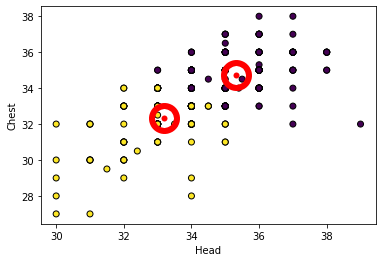

In [25]:
plt.subplot()
plt.scatter(x=birth.Head,y=birth.Chest, c=y_predict_ab, edgecolors='black')
plt.scatter(x=clstbirth.cluster_centers_[:,0],y=clstbirth.cluster_centers_[:,1],\
           c='red', linewidths=25, marker='o')
plt.xlabel('Head')
plt.ylabel('Chest')
# plt.show()
plt.savefig('data/clusterbirthbysex.jpeg', dpi=500)
plt.savefig('data/clusterbirthbysex.svg')

In [21]:
birth['label'] = clstbirth.labels_
birth['distance_to_center0'] = birth[birth.label == 0]\
.apply(lambda r: distance_to_centroid(r,clstbirth.cluster_centers_[0],['Head','Chest']),1)
birth['distance_to_center1'] = birth[birth.label == 1]\
.apply(lambda r: distance_to_centroid(r,clstbirth.cluster_centers_[1],['Head','Chest']),1)

In [22]:
birth

,Sex,Head,Chest,label,distance_to_center0,distance_to_center1
1,female,31.0,30.0,1,NaN,3.193564
2,female,36.0,35.3,0,0.899072,NaN
3,male,33.0,34.0,1,NaN,1.691102
4,male,35.0,36.0,0,1.320802,NaN
5,male,34.0,35.0,0,1.345278,NaN
...,...,...,...,...,...,...
396,female,36.0,35.0,0,0.740780,NaN
397,male,34.0,28.0,1,NaN,4.394572
398,female,34.0,33.0,1,NaN,1.054061
399,female,35.4,34.0,0,0.722361,NaN
